---  
title: "軌道伝播に関するノートブック"  
author: "Naoya Ozaki"  
date: "16 October 2021"  
output: "propagation"  

---  

# 軌道伝播に関するノートブック

## 1. 二体問題の伝播
二体問題の運動方程式である
$$
\frac{d^2\boldsymbol{r}}{dt^2} = -\frac{GM}{r^3}\boldsymbol{r}
$$
を`scipy.integrate`を用いて伝播する．但し，$\boldsymbol{r}=[x,y,z]$は中心天体に対する宇宙機の3次元位置ベクトルである．$r$は$\boldsymbol{r}$の大きさ（ノルム）を表す．$GM$は中心天体の重力定数である．

In [5]:
# Pythonのモジュールをインポート
import numpy as np # 数値計算ライブラリ
from scipy.integrate import odeint # 常微分方程式を解くライブラリ

# 二体問題の運動方程式
def func(x, t):
    """二体問題の運動方程式

    Args:
        x (np.ndarray): 状態量 (位置＋速度)
        t (float): 時刻

    Returns:
        np.ndarray: 状態量の時間微分
    """
    GM = 398600.4354360959 # 地球の重力定数, km3/s2
    r = np.linalg.norm(x[0:3])
    dxdt = np.block([x[3:6], 
                     -GM/(r**3)*x[0:3]])
    return dxdt 

# 微分方程式の初期条件
x0 = np.array([10000, 0, 0, 0, 7, 0])
t  = np.linspace(0, 86400, 1000) # 1日分 軌道伝播

# 微分方程式の数値計算
sol = odeint(func, x0, t)


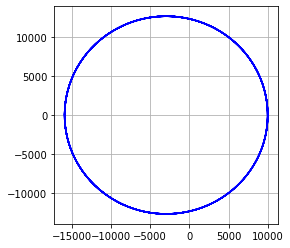

In [6]:
# 結果の描画
import matplotlib.pyplot as plt # 描画ライブラリ

# 描画
plt.plot(sol[:, 0],sol[:, 1], 'b')
plt.grid() # 格子をつける
plt.gca().set_aspect('equal') # グラフのアスペクト比を揃える
plt.show()

## 2. 円制限三体問題の伝播
円制限三体問題の運動方程式である
$$
\frac{d^2\boldsymbol{r}}{dt^2} = -\frac{1-\mu}{r_1^3}\boldsymbol{r}_1 - \frac{\mu}{r_2^3}\boldsymbol{r}_2 + H\boldsymbol{v} + K\boldsymbol{r}
$$
ここで
$$
\begin{align}
\boldsymbol{r}_1 & = \boldsymbol{r}+\begin{bmatrix}\mu \\ 0\\ 0\end{bmatrix} \\
\boldsymbol{r}_2 & = \boldsymbol{r}-\begin{bmatrix}1-\mu \\ 0\\ 0\end{bmatrix}\\
H &= \begin{bmatrix}
0 & 2 & 0\\
-2 & 0 & 0\\
0 & 0 & 0
\end{bmatrix}\\
K &= \begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0
\end{bmatrix}
\end{align}
$$
を`scipy.integrate`を用いて伝播する．但し，$\boldsymbol{r}=[x,y,z]$は二体の重心に対する回転座標系の3次元位置ベクトルである．$r$は$\boldsymbol{r}$の大きさ（ノルム）を表す．$\mu$は二体の質量比であり，$\mu = m_2/(m_1+m_2)$である．なお，太陽・地球系の三体問題については$\mu = 3.036\times 10^{-6}$，地球・月系の三体問題については$\mu = 0.01215$である．

In [7]:
# Pythonのモジュールをインポート
import numpy as np  # 数値計算ライブラリ
from scipy.integrate import odeint  # 常微分方程式を解くライブラリ


# 円制限三体問題の運動方程式
def func(x, t):
    """円制限三体問題の運動方程式

    Args:
        x (np.ndarray): 状態量 (位置＋速度)
        t (float): 時刻

    Returns:
        np.ndarray: 状態量の時間微分
    """
    mu = 0.01215  # 地球・月系のmu
    r_1 = x[0:3] + np.array([mu, 0.0, 0.0])
    r_2 = x[0:3] - np.array([1.0-mu, 0.0, 0.0])
    h_mat = np.array([[ 0.0, 2.0, 0.0],
                      [-2.0, 0.0, 0.0],
                      [ 0.0, 0.0, 0.0]])
    k_mat = np.array([[1.0, 0.0, 0.0],
                      [0.0, 1.0, 0.0],
                      [0.0, 0.0, 0.0]])
    r_1_norm = np.linalg.norm(r_1)
    r_2_norm = np.linalg.norm(r_2)
    
    dxdt = np.block([
        x[3:6],
        -(1.0-mu)/(r_1_norm**3)*r_1 - mu/(r_2_norm**3)*r_2 \
            + np.dot(h_mat,x[3:6]) + np.dot(k_mat,x[0:3])
        ])
    return dxdt


# 微分方程式の初期条件 (2:9 朔望同期NRHO)
x0 = np.array([0.987384153663276, 0.0, 0.008372273063008, 0.0, 1.67419265037912, 0.0])
t = np.linspace(0, -1.511*10, 1000)  # NRHOを1周分 軌道伝播

# 微分方程式の数値計算
sol = odeint(func, x0, t)


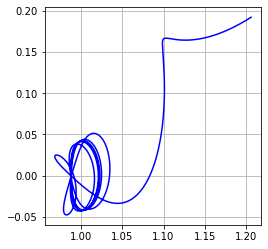

In [8]:
# 結果の描画
import matplotlib.pyplot as plt  # 描画ライブラリ

# 描画
plt.plot(sol[:, 0], sol[:, 1], 'b')
plt.grid()  # 格子をつける
plt.gca().set_aspect('equal')  # グラフのアスペクト比を揃える
plt.show()
